<a href="https://colab.research.google.com/github/vekoada/tensorflow-course/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
#Create basic data
from sklearn.datasets import make_circles
n = 1000
X, y = make_circles(n, noise=0.05)

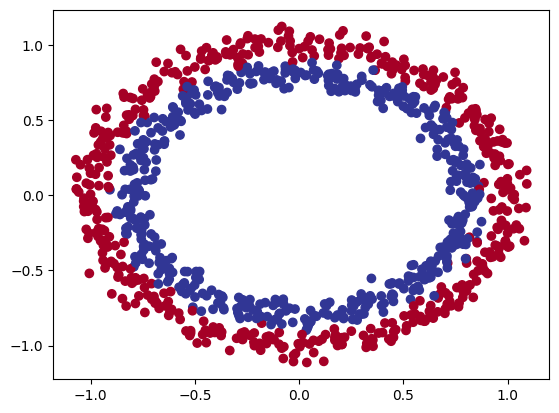

In [ ]:
#Visualize the data
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#Check shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/100))
call_back = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, mode='min', restore_best_weights=True) #stops training early if loss doesn't decrease for 4 epochs in a row

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006),#Best learning rate to optimize loss (lrs graph)
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=1000, callbacks=[call_back], verbose=0)

Text(0.5, 0, 'epochs')

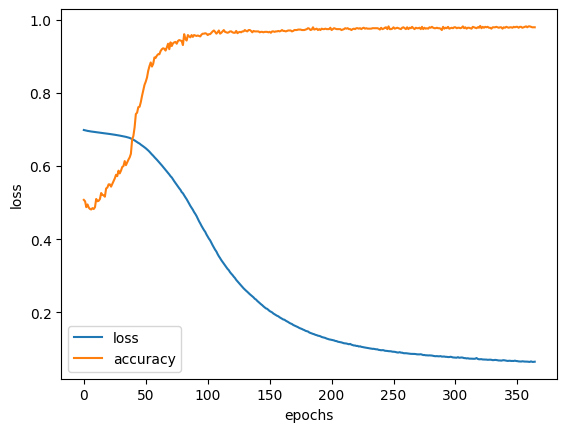

In [ ]:
#Plot the history
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9700


[0.0811956375837326, 0.9700000286102295]

In [ ]:
import numpy as np

In [ ]:
#Creating a function to visualize our predictions
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by a model
  """
  #Define axis boundaries of plot and create meshgrid
  xmin, xmax = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  ymin, ymax = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                       np.linspace(ymin, ymax, 100))
  #Create x value to make predictions
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0])>1:
    print("Doing multiclass classification")
    #Reshape prediction
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

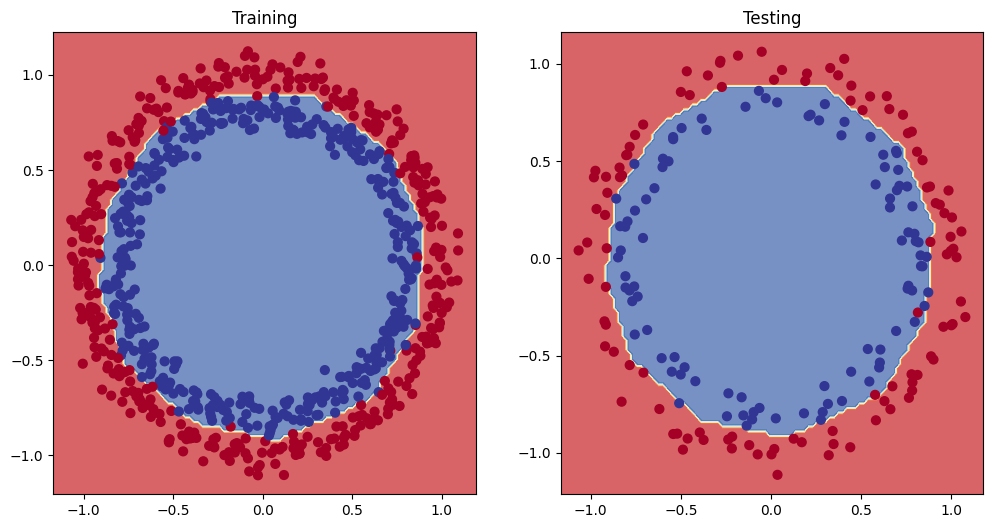

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model=model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model=model_1, X=X_test, y=y_test)
plt.show

Text(0.5, 1.0, 'Learning rate vs Loss')

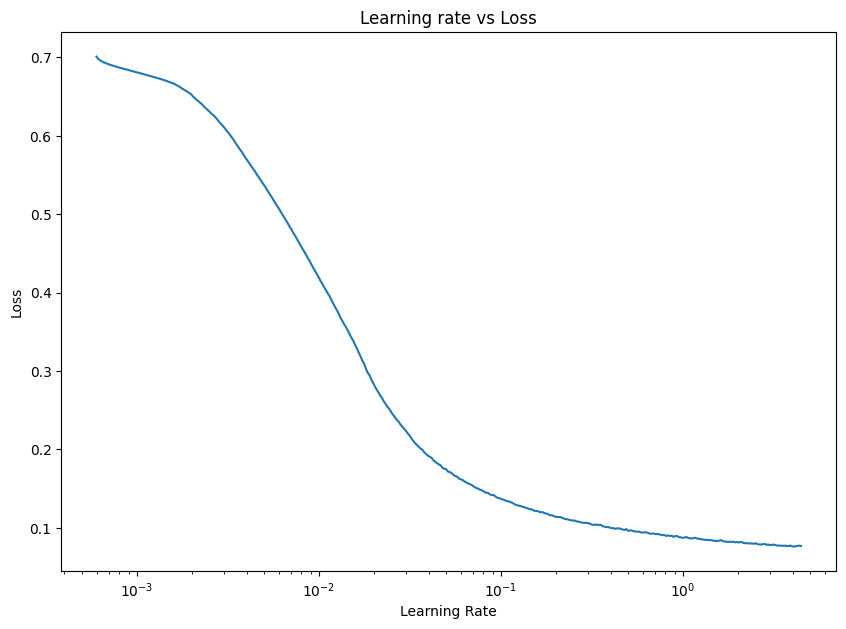

In [ ]:
#Plotting learning rate vs loss
#lrs = 1e-4 * (10**(tf.range(388)/100)) #only displays correctly when using learning scheduler callback
#plt.figure(figsize=(10,7))
#plt.semilogx(lrs, history_1.history['loss'])
#plt.xlabel("Learning Rate")
#plt.ylabel('Loss')
#plt.title("Learning rate vs Loss")
#Ideal learning rate is where the loss is still decreasing

In [ ]:
#Checking the accuracy of our model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9700
Model loss on the test set: 0.0811956375837326
Model accuracy on the test set: 97.00%


In [ ]:
#Creating a confusion matrix for our model
from sklearn.metrics import confusion_matrix
y_preds = model_1.predict(X_test)
#confusion_matrix(y_test, y_preds) #by default, our preds are probability so we have to convert
confusion_matrix(y_test, tf.round(y_preds))


7/7 [==============================] - 0s 3ms/step


array([[103,   3],
       [  3,  91]])

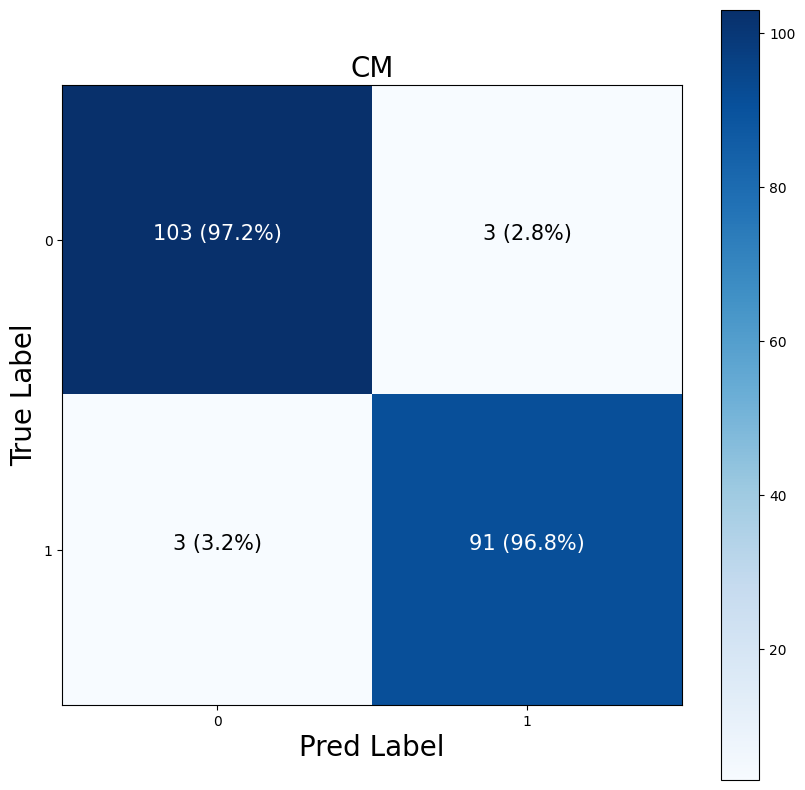

In [ ]:
#Making a prettier version of the CM
import itertools
figsize=(10,10)

#Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalizing
n_classes = cm.shape[0]

#visuals
fig, ax = plt.subplots(figsize=figsize)

#plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Classes
classes = False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#Label axes
ax.set(title='CM',
       xlabel='Pred Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

#Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

#Threshold for colors
threshold = (cm.max() + cm.min()) / 2.

#Plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
  horizontalalignment='center',
  color='white' if cm[i, j] > threshold else 'black',
  size=15)
